**ENPM 703 Final Project**

Team : **RoboTech Terps**

Members:
- Suraj Kalwaghe
- Tanmay Pancholi
- Kirti Kishore

LLMs selected for the project are as follows: -
- **MuRIL**: Specifically trained on Indian languages.
- **BERT**: A general-purpose multilingual model.
- **SanBERT**: A BERT variant fine-tuned for Sanskrit.
- **ByT5**: A byte-level model trained on multiple languages.

Testing Fertility score for tokenizers of different LLMs (ByT5, MuRIL, San-BERT, BERT) for manually providing the input data. The below script successfully generates a Fertility Score vs Model bar graph for four different models: MuRIL, BERT, SanBERT, and ByT5. The fertility score is a metric that measures the number of tokens generated per word by a tokenizer.


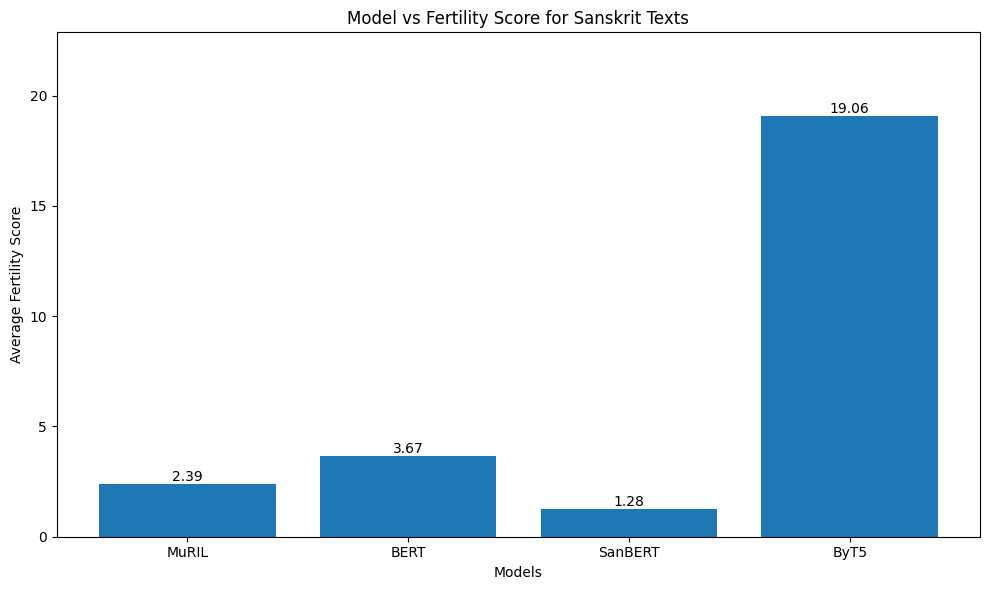

In [ ]:
from transformers import AutoTokenizer, BertTokenizer, pipeline, AutoModelForMaskedLM, AutoModelForSeq2SeqLM
import numpy as np
import matplotlib.pyplot as plt

# Loading tokenizers for the selected models
muril_tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
sanBert_tokenizer = AutoTokenizer.from_pretrained("sampathlonka/San-BERT")
byt5_tokenizer = AutoTokenizer.from_pretrained("google/byt5-xxl")

# Preparing the Sanskrit text
# Input data
sanskrit_texts = [
    "वृक्षा नमस्कुर्वन्ते मे ",
    " कर्मणो फलभोगान",
   "कुटुंकं जीवनं मम",
]

# Calculating the fertility score
# Averaging the number of tokens per word for a single text
def calculate_fertility(tokenizer, text):
    tokens = tokenizer.tokenize(text)
    words = text.split()
    return len(tokens) / len(words)

# Averaging the fertility over multiple texts
def calculate_average_fertility(tokenizer, texts):
    total_fertility = 0
    for text in texts:
        total_fertility += calculate_fertility(tokenizer, text)
    return total_fertility / len(texts)

# Calculating the average fertility score for each model across all Sanskrit texts
muril_avg_fertility = calculate_average_fertility(muril_tokenizer, sanskrit_texts)
bert_avg_fertility = calculate_average_fertility(bert_tokenizer, sanskrit_texts)
sanBert_avg_fertility = calculate_average_fertility(sanBert_tokenizer, sanskrit_texts)
byt5_avg_fertility = calculate_average_fertility(byt5_tokenizer, sanskrit_texts)

models = ['MuRIL', 'BERT', 'SanBERT', 'ByT5']
fertility_scores = [muril_avg_fertility, bert_avg_fertility, sanBert_avg_fertility, byt5_avg_fertility]

# Plotting the fertility scores vs model graph
plt.figure(figsize=(10, 6))
plt.bar(models, fertility_scores)
plt.title('Model vs Fertility Score for Sanskrit Texts')
plt.xlabel('Models')
plt.ylabel('Average Fertility Score')
plt.ylim(0, max(fertility_scores) * 1.2)  # Set y-axis limit to 120% of max score

# Adding the value labels on top of each bar
for i, v in enumerate(fertility_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_vs_fertility.png')
plt.show()


**Explanation of Each Model's Performance** (Based on the Graph):

- MuRIL Fertility Score (2.39):
MuRIL is a multilingual model trained on Indian languages, including Sanskrit. A fertility score of 2.39 indicates that it tokenizes Sanskrit relatively efficiently, splitting each word into approximately 2.39 tokens on average.
- BERT Fertility Score (3.67):
BERT is a general-purpose multilingual model (not specifically trained on Sanskrit). Its higher fertility score of 3.67 suggests that it struggles more with Sanskrit text compared to MuRIL, likely because it wasn't trained on as much Indian language data.
- SanBERT Fertility Score (1.28):
SanBERT is specifically designed for Sanskrit, and its low fertility score of 1.28 shows that it handles Sanskrit text very well, generating fewer tokens per word. This suggests that SanBERT's tokenizer is highly optimized for Sanskrit's unique morphological structure.
- ByT5 Fertility Score (19.06):
ByT5 uses a byte-level tokenization approach, which means it breaks down text into individual bytes rather than subwords or words. This leads to a very high fertility score (19.06), as each word is split into many byte-level tokens. While this approach can be effective for certain tasks, it results in much higher token counts for morphologically complex languages like Sanskrit.

Testing Fertility score for tokenizers of different LLMs (ByT5, MuRIL, San-BERT, BERT) by autoencoding the input data through a .json file **(Content from: Atharva Veda)**


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Token indices sequence length is longer than the specified maximum sequence length for this model (728 > 512). Running this sequence through the model will result in indexing errors


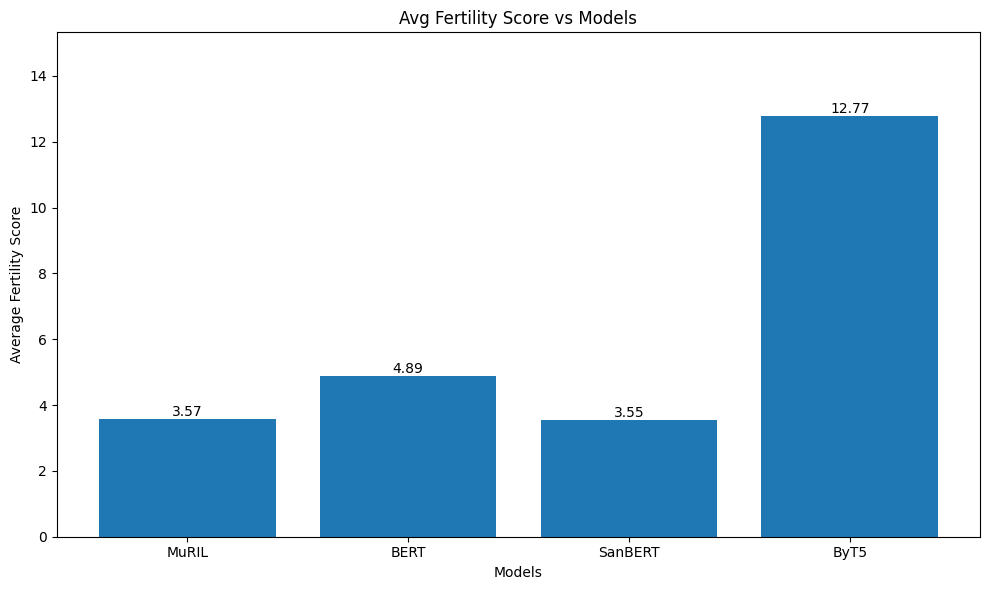

In [11]:
from google.colab import drive
import json
from transformers import AutoTokenizer, BertTokenizer, pipeline, AutoModelForMaskedLM, AutoModelForSeq2SeqLM
import numpy as np
import matplotlib.pyplot as plt


drive.mount('/content/drive')
json_file_path = '/content/drive/MyDrive/Colab Notebooks/ENPM703 Final Project/dataset/atharva_veda_small.json'


# Loading tokenizers for the selected models
muril_tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
sanBert_tokenizer = AutoTokenizer.from_pretrained("sampathlonka/San-BERT")
byt5_tokenizer = AutoTokenizer.from_pretrained("google/byt5-xxl")


# Load Sanskrit texts from a JSON file
with open(json_file_path, 'r', encoding='utf-8') as f:
    sanskrit_texts_dict = json.load(f)

# Extract only the text values from the dictionary
# Ensuring all the input is in a valid string format
sanskrit_texts = [str(text) for text in sanskrit_texts_dict.values() if text]

# Calculating the fertility score
# Averaging the number of tokens per word for a single text
def calculate_fertility(tokenizer, text):
    tokens = tokenizer.tokenize(text)
    words = text.split()
    return len(tokens) / len(words)

# Averaging the fertility over multiple texts
def calculate_average_fertility(tokenizer, texts):
    total_fertility = 0
    valid_texts_count = 0
    for text in texts:

        # Checking if the text is not empty after stripping whitespace
        if text.strip():
            total_fertility += calculate_fertility(tokenizer, text)
            valid_texts_count += 1
    return total_fertility / valid_texts_count if valid_texts_count > 0 else 0

# Calculating the average fertility score for each model across all Sanskrit texts
muril_avg_fertility = calculate_average_fertility(muril_tokenizer, sanskrit_texts)
bert_avg_fertility = calculate_average_fertility(bert_tokenizer, sanskrit_texts)
sanBert_avg_fertility = calculate_average_fertility(sanBert_tokenizer, sanskrit_texts)
byt5_avg_fertility = calculate_average_fertility(byt5_tokenizer, sanskrit_texts)

# Preparing the data for plotting (Model names and their fertility scores)
models = ['MuRIL', 'BERT', 'SanBERT', 'ByT5']
fertility_scores = [muril_avg_fertility, bert_avg_fertility, sanBert_avg_fertility, byt5_avg_fertility]

# Plotting results: Fertility scores vs model graph
plt.figure(figsize=(10, 6))
plt.bar(models, fertility_scores)
plt.title('Avg Fertility Score vs Models')
plt.xlabel('Models')
plt.ylabel('Average Fertility Score')
plt.ylim(0, max(fertility_scores) * 1.2)  # Set y-axis limit to 120% of max score

# Adding the value labels on top of each bar
for i, v in enumerate(fertility_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_vs_fertility.png')
plt.show()

**Results & Analysis**: -
- SanBERT and MuRIL have the lowest fertility scores, indicating that they are more efficient at tokenizing Sanskrit texts compared to BERT and ByT5.
ByT5, with its byte-level tokenization, generates significantly more tokens per word, which may not be ideal for tasks where efficient tokenization is important.
The relatively high score of BERT compared to MuRIL and SanBERT suggests that BERT's general-purpose multilingual tokenizer isn’t as well-suited for handling the complexities of Sanskrit.
- For tasks involving Sanskrit texts, SanBERT and MuRIL appear to be the most efficient models in terms of tokenization.
- For the goal  to develop an NLP system specifically for Sanskrit texts (e.g., question-answering or text generation), SanBERT seems to be the most appropriate choice due to its low fertility score and optimization for Sanskrit.